# Sentiment Analysis on  Restaurant Reviews

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim
import os
import string
import re

In [2]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report

#### loading the data 

In [3]:
df = pd.read_csv("Restaurant_Reviews.tsv",delimiter = "\t",quoting=3)

In [4]:
df.head(10)

Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1
5     Now I am getting angry and I want my damn pho.      0
6              Honeslty it didn't taste THAT fresh.)      0
7  The potatoes were like rubber and you could te...      0
8                          The fries were great too.      1
9                                     A great touch.      1

In [5]:
df.shape

(1000, 2)

In [6]:
df.dtypes

Review    object
Liked      int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### EDA

In [8]:
import plotly.express as px

In [9]:
Labels = pd.DataFrame(df['Liked'].value_counts()).reset_index()
Labels.columns = ['Liked','Count']
Labels['Liked'] = Labels['Liked'].map({0: 'Negative',1: 'Positive'})

fig = px.pie(Labels, values = 'Count', names = 'Liked', title='Percentage of reviews', hole=.4, color = 'Liked',
             width=800, height=400)
fig.show()

#### let see the most used words in postive  reviews!

In [10]:
positive= df[df["Liked"]==1]



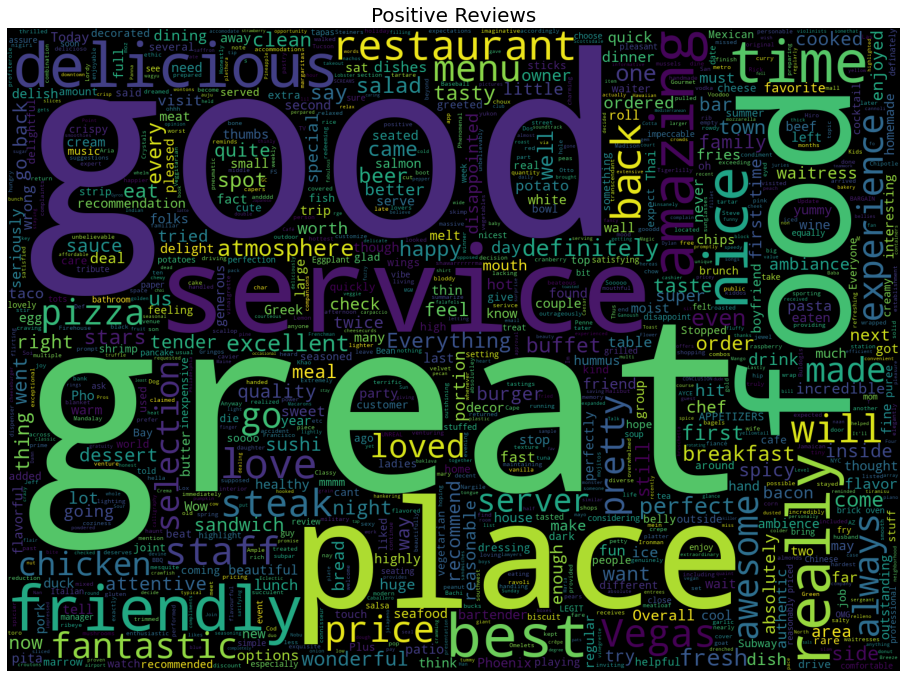

In [11]:
plt.subplots(figsize=(16,14))
worldcloud=WordCloud(
                        background_color='black',max_words = 10000,
                          width=1500, stopwords=STOPWORDS,
                          height=1080).generate(" ".join(positive.Review))

plt.title("Positive Reviews", fontsize=20)
plt.imshow(worldcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

let see the most used words in negative reviews!

In [12]:
negative= df[df["Liked"]==0]



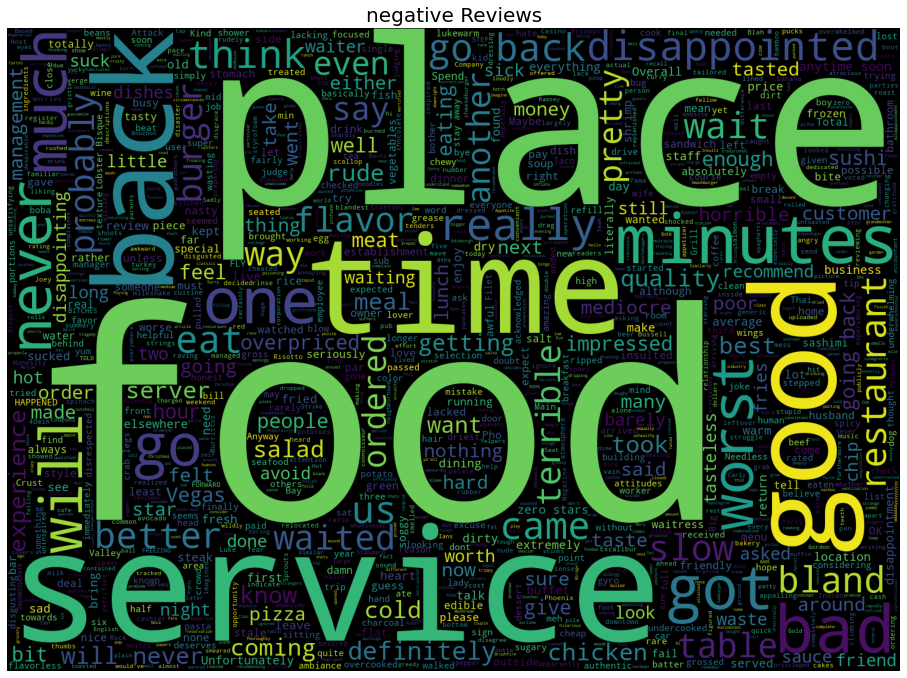

In [14]:
plt.subplots(figsize=(16,14))
worldcloud=WordCloud(
                        background_color='black',max_words = 10000,
                          width=1500, stopwords=STOPWORDS,
                          height=1080).generate(" ".join(negative.Review))

plt.title("negative Reviews", fontsize=20)
plt.imshow(worldcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

#### data cleaning 

In [15]:
stopwords = stopwords.words("english")
stopwords.remove("not")

In [16]:
def clean_sent(text):
    
    ## splitting the sent into words
    words=word_tokenize(text)
    
    ## removing the punctuation from the words list 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    words=[re_punc.sub('',word) for word in words ]
    
    
    ## removing un-printable words from the word list
    re_unprintable = re.compile('[^%s]' % re.escape(string.printable))
    words = [re_unprintable.sub('', word) for word in words]
    
    ## removing non- alphabetic 
    words = [word for word in words if word.isalpha()]
    
    
    ## removing the word with only one  charater 
    words = [word for word in words if len(word)>1]
    
    
    ## lowering the case of all the words
    words = [word.lower()for word in words]
    
    
    ## removing the stopwords from the words 
    words = [word for word in words if word  not in set(stopwords)]
    
    ## stemming the words 
    
    words = [WordNetLemmatizer().lemmatize(word) for word in words]
    
    ## joining the words again to make a sentence
    
    return " ".join(words)
    
    

In [17]:
corpus=[]
for text in df["Review"]:
    corpus.append(clean_sent(text))

In [18]:
print(corpus[:15])

['wow loved place', 'crust not good', 'not tasty texture nasty', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great price', 'getting angry want damn pho', 'honeslty nt taste fresh', 'potato like rubber could tell made ahead time kept warmer', 'fry great', 'great touch', 'service prompt', 'would not go back', 'cashier care ever say still ended wayyy overpriced', 'tried cape cod ravoli chicken cranberry mmmm', 'disgusted pretty sure human hair']


#### Creating the bag of words model 

In [19]:
cv = CountVectorizer(max_features= 1500)
X=cv.fit_transform(corpus).toarray()
Y= df.iloc[:,-1].values

In [20]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
Y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

### splitting the dataset into the Trainging set and test set 

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20, random_state= 0)

### Model Building 

In [23]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB()

#### predicting

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

#### confusion Matrix 

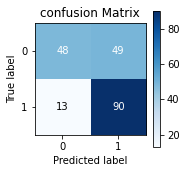

Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.49      0.61        97
           1       0.65      0.87      0.74       103

    accuracy                           0.69       200
   macro avg       0.72      0.68      0.68       200
weighted avg       0.72      0.69      0.68       200

Accuracy of the model:  0.69


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred))

acc=accuracy_score(Y_test, y_pred)
print("Accuracy of the model: ",acc)

### using SVM

In [27]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,Y_train)

SVC()

In [28]:
y_pred_svm = svm.predict(X_test)

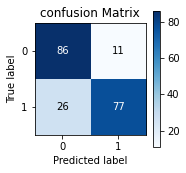

Classification report: 
              precision    recall  f1-score   support

           0       0.77      0.89      0.82        97
           1       0.88      0.75      0.81       103

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.82      0.81      0.81       200

Accuracy of the model:  0.815


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,y_pred_svm)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred_svm))

acc=accuracy_score(Y_test, y_pred_svm)
print("Accuracy of the model: ",acc)

#### using random forest 

In [30]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,Y_train)

RandomForestClassifier()

In [31]:
y_pred_RF = RF.predict(X_test)

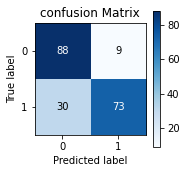

Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        97
           1       0.89      0.71      0.79       103

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.80       200
weighted avg       0.82      0.81      0.80       200

Accuracy of the model:  0.805


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,y_pred_RF)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred_RF))

acc=accuracy_score(Y_test, y_pred_RF)
print("Accuracy of the model: ",acc)

### RandomizedSearchCV

In [33]:
from scipy.stats import randint as sp_randint

In [34]:
param_dist = {
  "n_estimators": [2300,2400,2500],
  "max_depth": [3, None],
  "max_features": sp_randint(1, 11),
  "min_samples_split": sp_randint(2, 11),
  "min_samples_leaf": sp_randint(1, 11),
  "bootstrap": [True, False],
  "criterion": ["gini", "entropy"]
}

In [35]:
rfc = RandomForestClassifier()

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
# Use RandomizedSearchCV to search for the best hyperparameters
n_iter_search = 20
randomforest = RandomizedSearchCV(rfc, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

In [38]:
# Fit the classifier to the training data
randomforest.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022F2236E508>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022F22062388>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022F22366C08>,
                                        'n_estimators': [2300, 2400, 2500]})

In [39]:
# Print the best parameters and the best score
print("Best parameters: ", randomforest.best_params_)
print("Best score: ", randomforest.best_score_)

Best parameters:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 2500}
Best score:  0.8075000000000001


In [40]:
y_pred_RF = randomforest.predict(X_test)

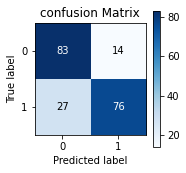

Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        97
           1       0.84      0.74      0.79       103

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200

Accuracy of the model:  0.795


In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,y_pred_RF)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred_RF))

acc=accuracy_score(Y_test, y_pred_RF)
print("Accuracy of the model: ",acc)

#### FUNCTION FOR PREDICATION 

In [49]:
def predict_sentance(review):
    
    review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if word  not in set(stopwords)]
    ps= PorterStemmer()
    final_review = [ps.stem(word) for word in review]
    final_review= " ". join(final_review)
    
    temp=cv.transform([final_review]).toarray()
    return svm.predict(temp)

In [50]:
# Predicting values
sample_review = 'The food is really good here.'

if predict_sentance(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [52]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentance(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [53]:
# Predicting values
sample_review = 'food  was good but hotel was bad'

if predict_sentance(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!')

This is a POSITIVE review.
